# Proyecto de Mineria de Datos:

Descripción: Este proyecto tiene como objetivo comprobar la relación entre la popularidad de los animes con las evaluaciones que estos reciben en el sitio web MyAnimeList

Integrantes:

*   Ricardo Aliste G.
*   Rodrigo Carmona R.



# Importación de Librerias

In [1]:
!pip install factor_analyzer==0.2.3

In [2]:
!pip install mglearn

     |████████████████████████████████| 542kB 8.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=8b105aaeca843a4f3e90c2f3c378ee95278ec4244e91cf0d0a0e0cc7a1bece67
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [3]:
# Librerias particulares
import urllib
import mglearn
import graphviz
from graphviz import Digraph

# Librerias escenciales
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np 
import pandas as pd 

# Librerias para analisis PCA
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# Librerias de Analisis y entrenamiento de Clasificadores
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score
from sklearn import metrics

# Regresion Logistica
from sklearn.linear_model import LogisticRegression

#Librerias para MLP (Keras)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

#Libreria de SVM
from sklearn.svm import SVC, NuSVC

#Libreria de Clasificador Gaussiano
from sklearn.naive_bayes import GaussianNB

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Arbol de Decision
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Conexion con Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Pre-procesado del Conjunto de Datos

In [5]:
"""
URLs del CSV:
Ricardo: /content/drive/MyDrive/Mineria de Datos/Trabajo Semestral/
Rodrigo: /content/drive/MyDrive/Proyecto MDD/
"""
ruta = '/content/drive/MyDrive/Proyecto MDD/'
anime_df = pd.read_csv(ruta+"Anime_data.csv")
data_clean = anime_df.dropna(inplace=True)
anime_df.head(3)

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",TV,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun


In [6]:
anime_df=anime_df[['Anime_id', 'Genre', 'Type', 'Producer', 'Studio', 'Rating', 'ScoredBy', 'Popularity', 'Members', 'Episodes', 'Source']]
df_base=anime_df['Anime_id']
anime_df.head(3)

,Anime_id,Genre,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source
0,1,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original
1,5,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original
2,6,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",TV,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga


In [7]:
genero=np.array(anime_df['Genre'])
tipo=np.array(anime_df['Type'])
productor=np.array(anime_df['Producer'])
studio=np.array(anime_df['Studio'])
fuente=np.array(anime_df['Source'])

In [8]:
print(np.unique(genero))
print("---------------------------------------------------")
print(np.unique(tipo))
print("---------------------------------------------------")
print(np.unique(productor))
print("---------------------------------------------------")
print(np.unique(studio))
print("---------------------------------------------------")
print(np.unique(fuente))

["['Action', 'Adventure', 'Cars', 'Comedy', 'Sci-Fi', 'Shounen']"
 "['Action', 'Adventure', 'Comedy', 'Demons', 'Drama', 'Ecchi', 'Horror', 'Mystery', 'Romance', 'Sci-Fi']"
 "['Action', 'Adventure', 'Comedy', 'Demons', 'Shounen', 'Supernatural']"
 ... "['Supernatural', 'Slice of Life']" "['Supernatural']"
 "['Thriller', 'Sci-Fi']"]
---------------------------------------------------
['Movie' 'Music' 'ONA' 'OVA' 'Special' 'TV']
---------------------------------------------------
["['4Kids Entertainment', 'Nintendo']" "['501st JOINT FIGHTER WING']"
 "['5pb.']" ...
 "['m.o.e.', 'Media Factory', 'Half H.P Studio', 'Houbunsha', 'Index', 'Toranoana']"
 "['m.o.e.', 'Pony Canyon']" "['m.o.e.']"]
---------------------------------------------------
["['10Gauge']" "['8bit']" "['A-1 Pictures', 'Bridge']"
 "['A-1 Pictures', 'CLOVERWORKS']" "['A-1 Pictures', 'Ordet']"
 "['A-1 Pictures', 'TROYCA']" "['A-1 Pictures', 'Trigger', 'CLOVERWORKS']"
 "['A-1 Pictures']" "['A-Real']" "['A.C.G.T.']" "['ACC Pro

## Tipo

In [9]:
anime_df.Type[(anime_df.Type=='Movie')]=0
anime_df.Type[(anime_df.Type=='Music')]=1
anime_df.Type[(anime_df.Type=='ONA')]=2
anime_df.Type[(anime_df.Type=='OVA')]=3
anime_df.Type[(anime_df.Type=='Special')]=4
anime_df.Type[(anime_df.Type=='TV')]=5
anime_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Anime_id,Genre,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source
0,1,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",5,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original
1,5,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']",0,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original
2,6,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",5,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga
3,7,"['Action', 'Magic', 'Police', 'Supernatural', ...",5,['Bandai Visual'],['Sunrise'],7.34,31875.0,1278.0,74889.0,26.0,Original
5,15,"['Action', 'Sports', 'Comedy', 'Shounen']",5,"['TV Tokyo', 'Nihon Ad Systems', 'TV Tokyo Mus...",['Studio Gallop'],8.05,48765.0,888.0,106468.0,145.0,Manga


## Fuente

In [10]:
fuente=['4-koma manga', 'Book', 'Card game', 'Digital manga', 'Game', 'Light novel', 'Manga', 'Music', 'Novel', 'Original', 
        'Picture book', 'Radio', 'Visual novel', 'Web manga', 'Other', 'Unknown']
        
anime_df.Source[(anime_df.Source == '4-koma manga')]=0
anime_df.Source[(anime_df.Source == 'Book')]=1
anime_df.Source[(anime_df.Source == 'Card game')]=2
anime_df.Source[(anime_df.Source == 'Digital manga')]=3
anime_df.Source[(anime_df.Source == 'Game')]=4
anime_df.Source[(anime_df.Source == 'Light novel')]=5
anime_df.Source[(anime_df.Source == 'Manga')]=6
anime_df.Source[(anime_df.Source == 'Music')]=7
anime_df.Source[(anime_df.Source == 'Novel')]=8
anime_df.Source[(anime_df.Source == 'Original')]=9
anime_df.Source[(anime_df.Source == 'Picture book')]=10
anime_df.Source[(anime_df.Source == 'Radio')]=11
anime_df.Source[(anime_df.Source == 'Visual novel')]=12
anime_df.Source[(anime_df.Source == 'Web manga')]=13
anime_df.Source[(anime_df.Source == 'Other')]=14
anime_df.Source[(anime_df.Source == 'Unknown')]=15
anime_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

,Anime_id,Genre,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source
0,1,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",5,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,9
1,5,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']",0,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,9
2,6,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",5,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,6
3,7,"['Action', 'Magic', 'Police', 'Supernatural', ...",5,['Bandai Visual'],['Sunrise'],7.34,31875.0,1278.0,74889.0,26.0,9
5,15,"['Action', 'Sports', 'Comedy', 'Shounen']",5,"['TV Tokyo', 'Nihon Ad Systems', 'TV Tokyo Mus...",['Studio Gallop'],8.05,48765.0,888.0,106468.0,145.0,6


## Conversion con Arrays


In [11]:
def get_unique_data(arr):
  arr_names_list=[]
  for anime_personal_list in arr:
    aux=anime_personal_list.split("'")[1]
    if(aux not in arr_names_list):
      arr_names_list.append(aux)
  return arr_names_list

def get_puntual_data(word):
  word=word.split("'")[1]
  return word

def get_puntual_index(word, arr):
  return arr.index(word)

In [12]:
lista_genero=get_unique_data(genero)
lista_productor=get_unique_data(productor)
lista_studio=get_unique_data(studio)

print(len(lista_genero),lista_genero)
print(len(lista_productor),lista_productor)
print(len(lista_studio),lista_studio)

38 ['Action', 'Comedy', 'Drama', 'Sci-Fi', 'Samurai', 'Game', 'Adventure', 'Harem', 'Slice of Life', 'Military', 'Space', 'Music', 'Mecha', 'Supernatural', 'Historical', 'Mystery', 'Magic', 'School', 'Horror', 'Ecchi', 'Fantasy', 'Sports', 'Dementia', 'Psychological', 'Romance', 'Demons', 'Hentai', 'Kids', 'Police', 'Parody', 'Shounen', 'Cars', 'Martial Arts', 'Thriller', 'Josei', 'Seinen', 'Shoujo', 'Super Power']
461 ['Bandai Visual', 'Sunrise', 'Victor Entertainment', 'TV Tokyo', 'Genco', 'OB Planning', 'VAP', 'Production I.G', 'GDH', 'Group TAC', 'Marvelous', 'Movic', 'Aniplex', 'Fuji TV', 'Mainichi Broadcasting System', 'TV Tokyo Music', 'Sony Pictures Entertainment', 'Youmex', 'TBS', 'Lantis', 'Kadokawa Shoten', 'Mellow Head', 'Tatsunoko Production', 'Starchild Records', 'Sotsu', 'Atelier Musa', 'TV Asahi', 'Pony Canyon', 'Animax', 'Nihon Ad Systems', 'Audio Tanaka', 'NHK', 'm.o.e.', 'Pioneer LDC', 'Trinet Entertainment', 'Media Factory', 'Studio Fantasia', 'Geneon Universal Ente

### Genero

In [13]:
for i in range(0, len(genero)):
  genero[i]=get_puntual_index(get_puntual_data(genero[i]), lista_genero)

genero

array([0, 0, 0, ..., 11, 0, 8], dtype=object)

In [14]:
anime_df.Genre=genero
anime_df.head()

,Anime_id,Genre,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source
0,1,0,5,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,9
1,5,0,0,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,9
2,6,0,5,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,6
3,7,0,5,['Bandai Visual'],['Sunrise'],7.34,31875.0,1278.0,74889.0,26.0,9
5,15,0,5,"['TV Tokyo', 'Nihon Ad Systems', 'TV Tokyo Mus...",['Studio Gallop'],8.05,48765.0,888.0,106468.0,145.0,6


### Productor

In [15]:
for i in range(0, len(productor)):
  productor[i]=get_puntual_index(get_puntual_data(productor[i]), lista_productor)

productor

array([0, 1, 2, ..., 223, 460, 422], dtype=object)

In [16]:
anime_df.Producer=productor
anime_df.head()

,Anime_id,Genre,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source
0,1,0,5,0,['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,9
1,5,0,0,1,['Bones'],8.41,111187.0,475.0,179899.0,1.0,9
2,6,0,5,2,['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,6
3,7,0,5,0,['Sunrise'],7.34,31875.0,1278.0,74889.0,26.0,9
5,15,0,5,3,['Studio Gallop'],8.05,48765.0,888.0,106468.0,145.0,6


### Studio

In [ ]:
for i in range(0, len(studio)):
  studio[i]=get_puntual_index(get_puntual_data(studio[i]), lista_studio)

studio

In [19]:
anime_df.Studio=studio
anime_df.head()

,Anime_id,Genre,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source
0,1,0,5,0,0,8.81,363889.0,39.0,704490.0,26.0,9
1,5,0,0,1,1,8.41,111187.0,475.0,179899.0,1.0,9
2,6,0,5,2,2,8.31,197451.0,158.0,372709.0,26.0,6
3,7,0,5,0,0,7.34,31875.0,1278.0,74889.0,26.0,9
5,15,0,5,3,3,8.05,48765.0,888.0,106468.0,145.0,6



## Tablas Descriptivas de Codigos

In [20]:
tipo=np.unique(tipo)
n_tipo=[]

fuente=np.unique(fuente)
n_fuente=[]

n_genero=[]
n_productor=[]
n_studio=[]

for i in range(0, len(tipo)):
  n_tipo.append([i, tipo[i]])

for i in range(0, len(fuente)):
  n_fuente.append([i, fuente[i]])

for i in range(0, len(lista_genero)):
  n_genero.append([i, lista_genero[i]])

for i in range(0, len(lista_productor)):
  n_productor.append([i, lista_productor[i]])

for i in range(0, len(lista_studio)):
  n_studio.append([i, lista_studio[i]])

df_tipo = pd.DataFrame(data=n_tipo, columns=["Codigo", "Traducción"])
df_fuente = pd.DataFrame(data=n_fuente, columns=["Codigo", "Traducción"])
df_genero = pd.DataFrame(data=n_genero, columns=["Codigo", "Traducción"])
df_productor = pd.DataFrame(data=n_productor, columns=["Codigo", "Traducción"])
df_studio = pd.DataFrame(data=n_studio, columns=["Codigo", "Traducción"])

In [21]:
"""
URLs del CSV:
Ricardo: /content/drive/MyDrive/Mineria de Datos/Trabajo Semestral/Anime_data.csv
Rodrigo: /content/drive/MyDrive/Proyecto MDD/Anime_data.csv
"""
df_tipo.to_csv(r'/content/drive/MyDrive/Proyecto MDD/ Codigo_Tipos.csv', index = False)
df_fuente.to_csv(r'/content/drive/MyDrive/Proyecto MDD/ Codigo_Fuentes.csv', index = False)
df_genero.to_csv(r'/content/drive/MyDrive/Proyecto MDD/ Codigo_Generos.csv', index = False)
df_productor.to_csv(r'/content/drive/MyDrive/Proyecto MDD/ Codigo_Productores.csv', index = False)
df_studio.to_csv(r'/content/drive/MyDrive/Proyecto MDD/ Codigo_Studios.csv', index = False)

## Generacion de Clases segun Popularidad

In [22]:
anime_df.describe()

,Anime_id,Rating,ScoredBy,Popularity,Members,Episodes
count,4479.000000,4479.000000,4.479000e+03,4479.000000,4.479000e+03,4479.000000
mean,13786.506363,6.946890,2.969938e+04,4390.294485,5.850495e+04,16.805537
std,12788.259222,0.855212,6.977006e+04,3557.838748,1.192538e+05,46.984973
min,1.000000,2.330000,1.000000e+00,1.000000,1.400000e+01,1.000000
25%,2062.500000,6.430000,9.980000e+02,1473.000000,2.874500e+03,1.000000
50%,8840.000000,7.010000,5.371000e+03,3528.000000,1.378100e+04,12.000000
75%,26104.000000,7.520000,2.580700e+04,6603.500000,5.971150e+04,22.000000
max,39022.000000,10.000000,1.006242e+06,15679.000000,1.451708e+06,1818.000000


In [23]:
df=anime_df
df.loc[:, 'C_Popular'] = None
df.loc[df.Popularity <= 3528, 'C_Popular'] = 0 # Alta Popularidad
df.loc[df.Popularity > 3528, 'C_Popular'] = 1 # Escasa Popularidad
df.C_Popular.values.astype('int')
df.C_Popular.value_counts()

0    2240
1    2239
Name: C_Popular, dtype: int64

In [25]:
df=df[['Genre','Type','Source','Producer','Studio','Rating','Members','ScoredBy','Episodes','C_Popular']]
df.to_csv(r'/content/drive/MyDrive/Proyecto MDD/ Anime_Procesado.csv', index = False)
df.head()

,Genre,Type,Source,Producer,Studio,Rating,Members,ScoredBy,Episodes,C_Popular
0,0,5,9,0,0,8.81,704490.0,363889.0,26.0,0
1,0,0,9,1,1,8.41,179899.0,111187.0,1.0,0
2,0,5,6,2,2,8.31,372709.0,197451.0,26.0,0
3,0,5,9,0,0,7.34,74889.0,31875.0,26.0,0
5,0,5,6,3,3,8.05,106468.0,48765.0,145.0,0


# Analisis de Datos (PCA)

In [26]:
anime_df = pd.read_csv(ruta+" Anime_Procesado.csv")
anime_df.head()

,Genre,Type,Source,Producer,Studio,Rating,Members,ScoredBy,Episodes,C_Popular
0,0,5,9,0,0,8.81,704490.0,363889.0,26.0,0
1,0,0,9,1,1,8.41,179899.0,111187.0,1.0,0
2,0,5,6,2,2,8.31,372709.0,197451.0,26.0,0
3,0,5,9,0,0,7.34,74889.0,31875.0,26.0,0
4,0,5,6,3,3,8.05,106468.0,48765.0,145.0,0


In [27]:
col_names=['Genre','Type','Source','Producer','Studio','Rating','Members','ScoredBy','Episodes']
df_data=anime_df[col_names].values

pca=PCA()
pca.fit(df_data)

transformer=pca.transform(df_data)

Text(0, 0.5, 'PCA 2')

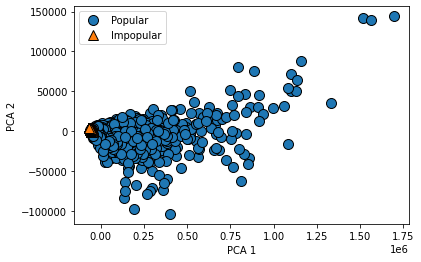

In [28]:
mglearn.discrete_scatter(transformer[:,0], transformer[:,1], anime_df.C_Popular)
plt.legend(['Popular', 'Impopular'], loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 2')

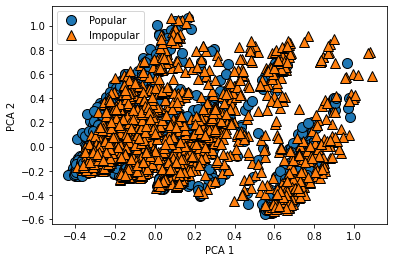

In [29]:
#Escalar información
escala = MinMaxScaler()
escala.fit(df_data)
escalada = escala.transform(df_data)
#Entrenar PCA con la data escalada
pca.fit(escalada)
#Transformar la información mediante PCA
transformada = pca.transform(escalada)
#Gráfico en relación al objetivo
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], anime_df.C_Popular)
plt.legend(['Popular', 'Impopular'], loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [30]:
df_for_PCA=anime_df[col_names]
df_for_PCA.head(2)

,Genre,Type,Source,Producer,Studio,Rating,Members,ScoredBy,Episodes
0,0,5,9,0,0,8.81,704490.0,363889.0,26.0
1,0,0,9,1,1,8.41,179899.0,111187.0,1.0


In [31]:
chi_square_value, p_value = calculate_bartlett_sphericity(df_for_PCA)
chi_square_value, p_value

(20017.023836342065, 0.0)

In [32]:
if(p_value<0.05):
  print("OK")
else:
  print("NO OK")

OK


In [33]:
kmo_all, kmo_model = calculate_kmo(df_for_PCA)
kmo_model

0.5669668076051186

In [34]:
fa = FactorAnalyzer()
fa.analyze(df_for_PCA, len(col_names), rotation = None)
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,2.559875
1,1.398204
2,1.142750
3,1.046841
4,0.862782
5,0.821658
6,0.589577
7,0.567077
8,0.011236


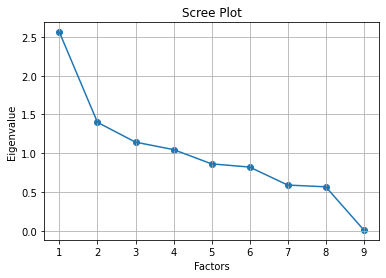

In [35]:
plt.scatter(range(1, df_for_PCA.shape[1]+1),ev)
plt.plot(range(1, df_for_PCA.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [36]:
fa = FactorAnalyzer()
fa.analyze(df_for_PCA, 5, rotation = "varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
Genre,-0.074269,0.015167,-0.079938,0.159554,0.239878
Type,0.071588,-0.091188,0.986057,-0.062897,0.075366
Source,-0.097525,0.011510,-0.029156,0.725654,0.033440
Producer,-0.081027,0.950654,-0.107667,0.042709,0.267130
Studio,0.008483,0.236600,-0.043443,-0.086853,0.512210
Rating,0.398975,-0.102308,0.022381,-0.244055,-0.360736
Members,0.987211,-0.034623,0.111906,-0.098518,-0.063665
ScoredBy,0.976169,-0.030557,0.080106,-0.066997,-0.050254
Episodes,0.034292,-0.012198,0.226717,-0.007317,-0.109567


In [37]:
df_factores = fa.loadings
df_factores.to_excel(ruta + 'Factores_MAL.xlsx')

# Normalizacion de los Datos

In [38]:
df_norm = anime_df[col_names].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print(len(anime_df))
df_norm.describe()

4479


,Genre,Type,Source,Producer,Studio,Rating,Members,ScoredBy,Episodes
count,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000
mean,0.149605,0.752623,0.539257,0.176181,0.220819,0.601941,0.040292,0.029514,0.008699
std,0.212660,0.335906,0.245276,0.238956,0.253801,0.111501,0.082148,0.069337,0.025859
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.600000,0.400000,0.026087,0.029499,0.534550,0.001970,0.000991,0.000000
50%,0.027027,1.000000,0.400000,0.063043,0.100295,0.610169,0.009483,0.005337,0.006054
75%,0.216216,1.000000,0.600000,0.226087,0.374631,0.676662,0.041123,0.025646,0.011558
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
anime_df=pd.concat([df_norm,anime_df['C_Popular']], axis=1)
anime_df.head(3)

,Genre,Type,Source,Producer,Studio,Rating,Members,ScoredBy,Episodes,C_Popular
0,0.0,1.0,0.6,0.000000,0.00000,0.844850,0.485279,0.361631,0.013759,0
1,0.0,0.0,0.6,0.002174,0.00295,0.792699,0.123914,0.110496,0.000000,0
2,0.0,1.0,0.4,0.004348,0.00590,0.779661,0.256731,0.196225,0.013759,0


In [40]:
df_train, df_test = train_test_split(anime_df, test_size = 0.3)
print(len(df_train), len(df_test), len(anime_df))

3135 1344 4479


In [41]:
x_train = df_train[col_names]
y_train = df_train.C_Popular.astype("int")
x_test = df_test[col_names]
y_test = df_test.C_Popular.astype("int")

In [42]:
x_train

,Genre,Type,Source,Producer,Studio,Rating,Members,ScoredBy,Episodes
2332,0.054054,0.8,0.6,0.041304,0.362832,0.475880,0.000859,0.000502,0.000000
905,0.702703,0.6,0.8,0.104348,0.277286,0.505867,0.002295,0.001351,0.000550
3537,0.540541,0.8,0.4,0.143478,0.539823,0.750978,0.009510,0.004857,0.001101
3196,0.270270,1.0,0.6,0.000000,0.002950,0.775750,0.058400,0.043639,0.006604
3864,0.567568,1.0,0.4,0.145652,0.666667,0.649283,0.051178,0.031873,0.012658
...,...,...,...,...,...,...,...,...,...
3675,0.216216,0.8,0.6,0.691304,0.058997,0.359844,0.001267,0.000309,0.000000
2778,0.027027,1.0,0.0,0.058696,0.687316,0.580183,0.037411,0.025592,0.006054
446,0.027027,1.0,0.6,0.000000,0.005900,0.661017,0.004766,0.003078,0.013759
1910,0.162162,1.0,0.4,0.173913,0.056047,0.719687,0.193871,0.116542,0.013209


In [43]:
y_train

2332    1
905     1
3537    0
3196    0
3864    0
       ..
3675    1
2778    0
446     1
1910    0
3017    1
Name: C_Popular, Length: 3135, dtype: int64

In [44]:
x_test

,Genre,Type,Source,Producer,Studio,Rating,Members,ScoredBy,Episodes
1821,0.000000,1.0,0.933333,0.163043,0.005900,0.685789,0.069346,0.035463,0.012658
1586,0.162162,1.0,0.266667,0.097826,0.000000,0.492829,0.004954,0.003857,0.026417
2519,0.000000,1.0,0.600000,0.026087,0.073746,0.641460,0.046993,0.036047,0.006604
4035,0.081081,1.0,0.600000,0.208696,0.787611,0.464146,0.000860,0.000191,0.026968
1414,0.000000,1.0,0.400000,0.041304,0.100295,0.666232,0.004357,0.001474,0.018162
...,...,...,...,...,...,...,...,...,...
2465,0.027027,0.8,0.133333,0.660870,0.011799,0.614081,0.003818,0.002638,0.000000
39,0.000000,1.0,0.400000,0.043478,0.056047,0.649283,0.098451,0.075499,0.013759
4027,0.000000,1.0,0.400000,0.067391,0.038348,0.602347,0.014532,0.006934,0.006054
1008,0.054054,0.0,0.400000,0.384783,0.005900,0.723598,0.015752,0.009126,0.000000


In [45]:
y_test

1821    0
1586    1
2519    0
4035    1
1414    1
       ..
2465    1
39      0
4027    0
1008    0
3610    1
Name: C_Popular, Length: 1344, dtype: int64

# Entrenamiento y Analisis de Modelos

## Logistic Regression

In [46]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

print('Acc (Train): ', lr.score(x_train, y_train))
print('Acc (Test): ', lr.score(x_test, y_test))

print("\nMatriz de confusion (Train):\n", confusion_matrix(y_train, lr.predict(x_train)))
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, lr.predict(x_test)))

Acc (Train):  0.8392344497607656
Acc (Test):  0.8333333333333334

Matriz de confusion (Train):
 [[1327  277]
 [ 227 1304]]
Matriz de confusion (Test):
 [[529 107]
 [117 591]]


## Decision Tree

In [47]:
# Armando un simple arbol de decisión
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

print('Acc (Train): ', tree.score(x_train, y_train))
print('Acc (Test): ', tree.score(x_test, y_test))

print("\nMatriz de confusion (Train):\n", confusion_matrix(y_train, tree.predict(x_train)))
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, tree.predict(x_test)))

Acc (Train):  1.0
Acc (Test):  0.9791666666666666

Matriz de confusion (Train):
 [[1604    0]
 [   0 1531]]
Matriz de confusion (Test):
 [[623  13]
 [ 15 693]]


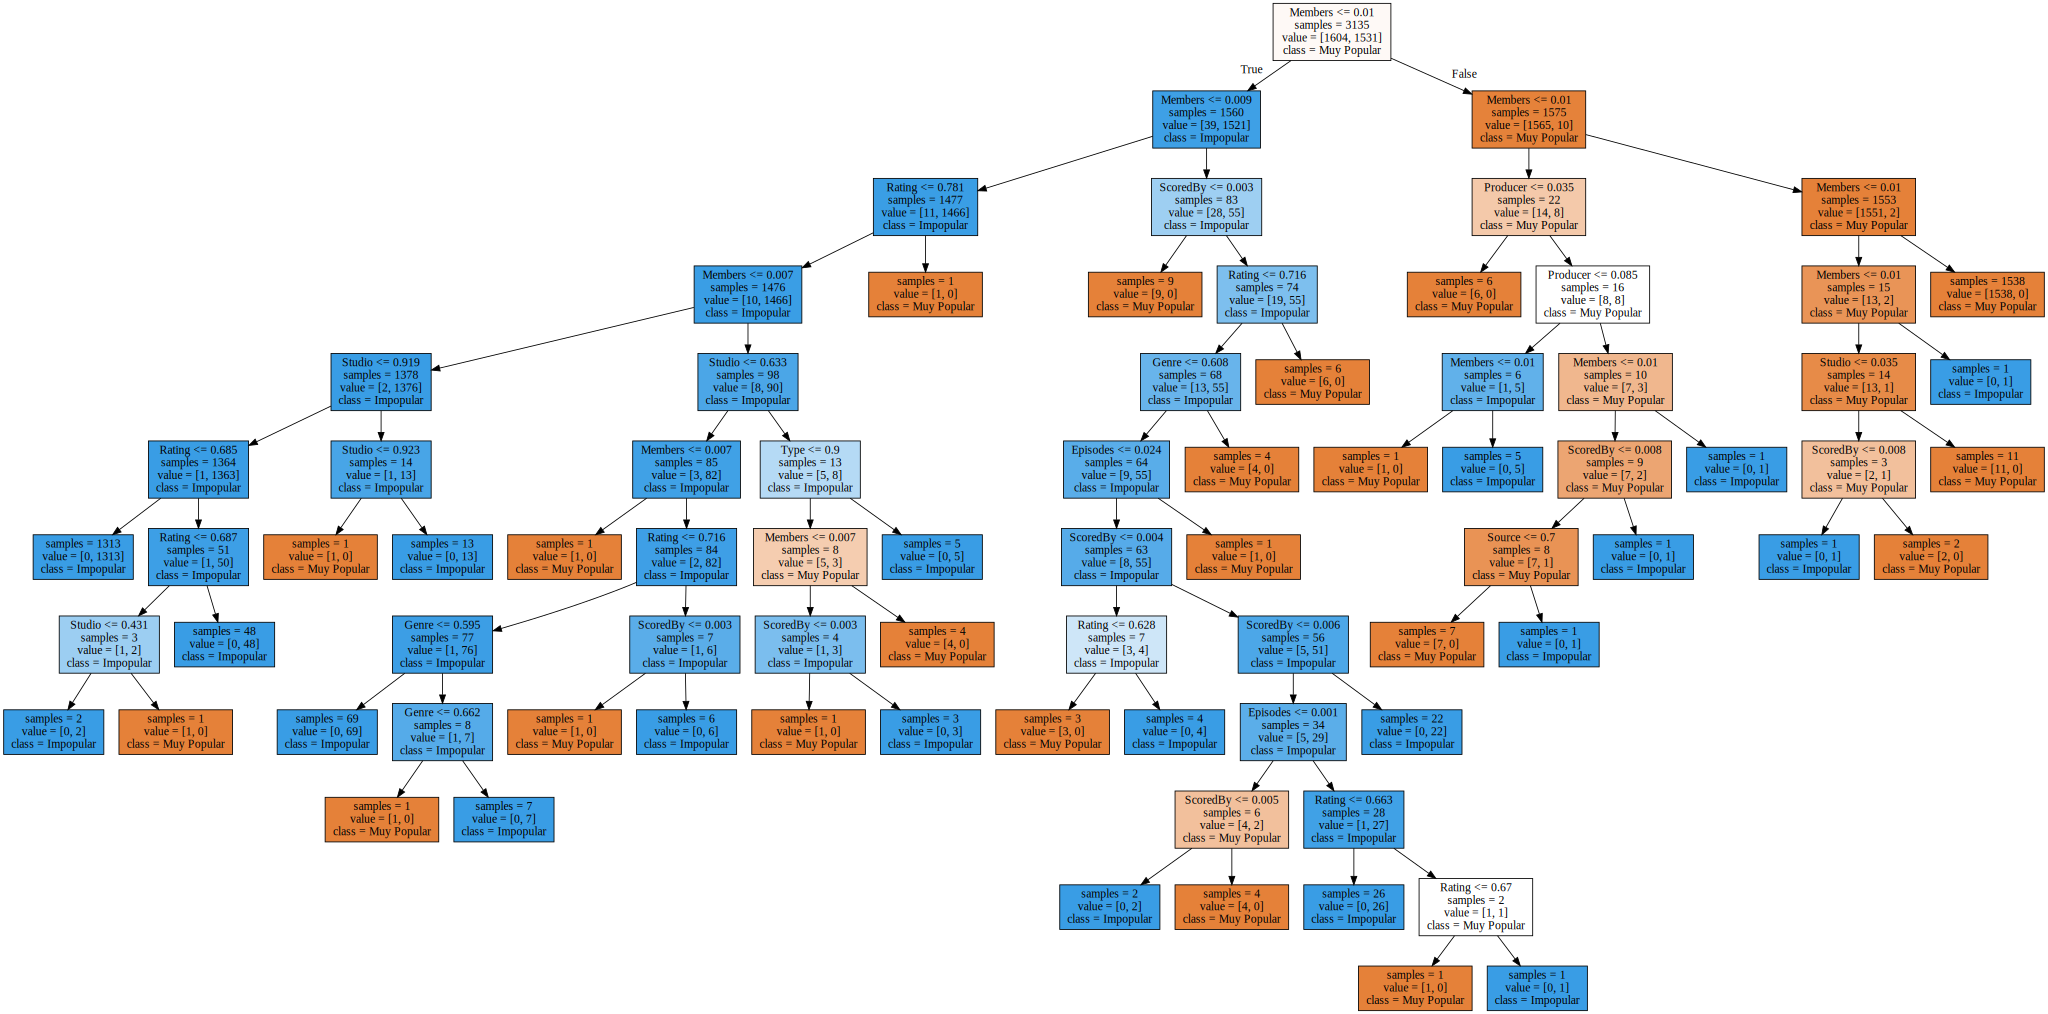

In [48]:
# Dibujando el modelo
export_graphviz(tree, out_file="tree.dot", class_names=['Muy Popular', 'Impopular'], 
                feature_names=col_names,  impurity=False,filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [49]:
!dot -Tjpeg tree.dot -o arbol_decision_personal.jpeg

Analisis de AdaBoost

In [50]:
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=1.5)

ada = ada.fit(x_train, y_train)

print('Acc (Train): ', lr.score(x_train, y_train))
print('Acc (Test): ', lr.score(x_test, y_test))

print("\nMatriz de confusion (Train):\n", confusion_matrix(y_train, lr.predict(x_train)))
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, lr.predict(x_test)))

Acc (Train):  0.8392344497607656
Acc (Test):  0.8333333333333334

Matriz de confusion (Train):
 [[1327  277]
 [ 227 1304]]
Matriz de confusion (Test):
 [[529 107]
 [117 591]]


In [51]:
f=ada.feature_importances_

In [52]:
imp = pd.DataFrame(zip(anime_df[col_names], ada.feature_importances_), columns = ['Caracteristica', 'Importancia'])
imp = imp.sort_values(by = 'Importancia', ascending = False)
imp

,Caracteristica,Importancia
6,Members,0.958719
5,Rating,0.012656
7,ScoredBy,0.010470
0,Genre,0.005660
8,Episodes,0.003469
4,Studio,0.003365
3,Producer,0.002754
2,Source,0.001812
1,Type,0.001094


## Random Forest

In [53]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

print('Acc (Train): ', precision_score(y_train, rf.predict(x_train)))
print('Acc (Test): ', precision_score(y_test, rf.predict(x_test)))

print("\nMatriz de confusion (Train):\n", confusion_matrix(y_train, rf.predict(x_train)))
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, rf.predict(x_test)))

Acc (Train):  1.0
Acc (Test):  0.9818688981868898

Matriz de confusion (Train):
 [[1604    0]
 [   0 1531]]
Matriz de confusion (Test):
 [[623  13]
 [  4 704]]


## SVMs

Nu-SVM

In [54]:
NU_SVM_1=NuSVC(nu=0.9, kernel="linear", gamma=1, probability=True)
NU_SVM_1.fit(x_train, y_train)

NU_SVM_2=NuSVC(nu=0.9, kernel="rbf", gamma=1, probability=True)
NU_SVM_2.fit(x_train, y_train)

NU_SVM_3=NuSVC(nu=0.9, kernel="sigmoid", gamma=1, probability=True)
NU_SVM_3.fit(x_train, y_train)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
      max_iter=-1, nu=0.9, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [55]:
print("Nu-SVM 1: Kernel Lineal")
print('Acc (Train): ', precision_score(y_train, NU_SVM_1.predict(x_train)))
print('Acc (Test): ', precision_score(y_test, NU_SVM_1.predict(x_test)))

print("\nMatriz de confusion (Train):\n", confusion_matrix(y_train, NU_SVM_1.predict(x_train)))
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, NU_SVM_1.predict(x_test)))

Nu-SVM 1: Kernel Lineal
Acc (Train):  0.7534807534807535
Acc (Test):  0.776735459662289

Matriz de confusion (Train):
 [[1303  301]
 [ 611  920]]
Matriz de confusion (Test):
 [[517 119]
 [294 414]]


In [56]:
print("Nu-SVM 2: Kernel Gaussiano")
print('Acc (Train): ', precision_score(y_train, NU_SVM_2.predict(x_train)))
print('Acc (Test): ', precision_score(y_test, NU_SVM_2.predict(x_test)))

print("\nMatriz de confusion (Train):\n", confusion_matrix(y_train, NU_SVM_2.predict(x_train)))
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, NU_SVM_2.predict(x_test)))

Nu-SVM 2: Kernel Gaussiano
Acc (Train):  0.7047945205479452
Acc (Test):  0.737984496124031

Matriz de confusion (Train):
 [[1173  431]
 [ 502 1029]]
Matriz de confusion (Test):
 [[467 169]
 [232 476]]


In [57]:
print("Nu-SVM 3: Kernel Sigmoidal")
print('Acc (Train): ', precision_score(y_train, NU_SVM_3.predict(x_train)))
print('Acc (Test): ', precision_score(y_test, NU_SVM_3.predict(x_test)))

print("\nMatriz de confusion (Train):\n", confusion_matrix(y_train, NU_SVM_3.predict(x_train)))
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, NU_SVM_3.predict(x_test)))

Nu-SVM 3: Kernel Sigmoidal
Acc (Train):  0.7424633936261843
Acc (Test):  0.7600767754318618

Matriz de confusion (Train):
 [[1305  299]
 [ 669  862]]
Matriz de confusion (Test):
 [[511 125]
 [312 396]]


C-SVM

In [58]:
SVM_1=SVC(C=10, kernel="linear", gamma=1, probability=True)
SVM_1.fit(x_train, y_train)

SVM_2=SVC(C=10, kernel="rbf", gamma=1, probability=True)
SVM_2.fit(x_train, y_train)

SVM_3=SVC(C=10, kernel="sigmoid", gamma=1, probability=True)
SVM_3.fit(x_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [59]:
print("SVM 1: Kernel Lineal")
print('Acc (Train): ', precision_score(y_train, SVM_1.predict(x_train)))
print('Acc (Test): ', precision_score(y_test, SVM_1.predict(x_test)))

print("\nMatriz de confusion (Train):\n", confusion_matrix(y_train, SVM_1.predict(x_train)))
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, SVM_1.predict(x_test)))

SVM 1: Kernel Lineal
Acc (Train):  0.8777267508610792
Acc (Test):  0.8948035487959443

Matriz de confusion (Train):
 [[1391  213]
 [   2 1529]]
Matriz de confusion (Test):
 [[553  83]
 [  2 706]]


In [60]:
print("SVM 2: Kernel Gaussiano")
print('Acc (Train): ', precision_score(y_train, SVM_2.predict(x_train)))
print('Acc (Test): ', precision_score(y_test, SVM_2.predict(x_test)))

print("\nMatriz de confusion (Train):\n", confusion_matrix(y_train, SVM_2.predict(x_train)))
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, SVM_2.predict(x_test)))

SVM 2: Kernel Gaussiano
Acc (Train):  0.9089253187613844
Acc (Test):  0.9080157687253614

Matriz de confusion (Train):
 [[1454  150]
 [  34 1497]]
Matriz de confusion (Test):
 [[566  70]
 [ 17 691]]


In [61]:
print("SVM 3: Kernel Sigmoidal")
print('Acc (Train): ', precision_score(y_train, SVM_3.predict(x_train)))
print('Acc (Test): ', precision_score(y_test, SVM_3.predict(x_test)))

print("\nMatriz de confusion (Train):\n", confusion_matrix(y_train, SVM_3.predict(x_train)))
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, SVM_3.predict(x_test)))

SVM 3: Kernel Sigmoidal
Acc (Train):  0.5215968586387435
Acc (Test):  0.5611745513866232

Matriz de confusion (Train):
 [[873 731]
 [734 797]]
Matriz de confusion (Test):
 [[367 269]
 [364 344]]


## Clasificador Bayesiano

In [62]:
Bayessiano= GaussianNB()
Bayessiano.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
print('Acc (Train): ', precision_score(y_train, Bayessiano.predict(x_train)))
print('Acc (Test): ', precision_score(y_test, Bayessiano.predict(x_test)))

print("\nMatriz de confusion (Train):\n", confusion_matrix(y_train, Bayessiano.predict(x_train)))
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, Bayessiano.predict(x_test)))

Acc (Train):  0.9592356687898089
Acc (Test):  0.957592339261286

Matriz de confusion (Train):
 [[1540   64]
 [  25 1506]]
Matriz de confusion (Test):
 [[605  31]
 [  8 700]]


## Red MLP

In [64]:
ES = EarlyStopping(monitor='loss', patience=20)

MLP=Sequential()
MLP.add(Dense(25, input_dim=len(col_names), activation='relu'))
MLP.add(Dense(25, activation='relu'))
MLP.add(Dropout(0.3))
MLP.add(Dense(10, activation='relu'))
MLP.add(Dropout(0.3))
MLP.add(Dense(5, activation='relu'))
MLP.add(Dense(2, activation='softmax'))

MLP.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1

In [65]:
# Compilacion del modelo
MLP.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Ajuste del modelo
MLP.fit(x_train, y_train, epochs=200, batch_size=10, callbacks=[ES])

Epoch 1/200
314/314 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4896
Epoch 2/200
314/314 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.4951
Epoch 3/200
314/314 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5027
Epoch 4/200
314/314 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.4967
Epoch 5/200
314/314 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5062
Epoch 6/200
314/314 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.4781
Epoch 7/200
314/314 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 8/200
314/314 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5021
Epoch 9/200
314/314 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.4970
Epoch 10/200
314/314 [==============================] - 1s 3ms/step - loss: 0.6931 - accura

In [66]:
prediction = MLP.evaluate(x_test, y_test, verbose=0)
print('Loss (Test): ',prediction[0])
print('Acc  (Test):', prediction[1])

print("\nMatriz de confusion (Train):\n", confusion_matrix(y_train, MLP.predict_classes(x_train)))
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, MLP.predict_classes(x_test)))

Loss (Test):  0.6931471824645996
Acc  (Test): 0.5267857313156128
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

Matriz de confusion (Train):
 [[   2 1602]
 [   0 1531]]
Matriz de confusion (Test):
 [[  0 636]
 [  0 708]]
